<a href="https://colab.research.google.com/github/shun0109/tmp/blob/main/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# Install seaborn if not already
!pip install seaborn --quiet

import pandas as pd
import numpy as np
from scipy import stats, integrate
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression, LinearRegression,Ridge,SGDClassifier
from sklearn.metrics import accuracy_score,roc_curve, confusion_matrix,classification_report,mean_squared_error,precision_score, \
recall_score,f1_score,classification_report,precision_recall_curve, roc_auc_score
from collections import Counter
from IPython.core.display import display, HTML
from sklearn.datasets import load_iris, load_wine, fetch_openml
from sklearn.svm import SVC
%matplotlib inline

In [3]:
from pathlib import Path

IMAGES_PATH=Path() / 'images' / 'classification'
IMAGES_PATH.mkdir(parents=True,exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [6]:
mnist=fetch_openml('mnist_784', as_frame=False)

In [7]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [8]:
X,y=mnist.data, mnist.target

In [10]:
X.shape

(70000, 784)

In [11]:
y.shape

(70000,)

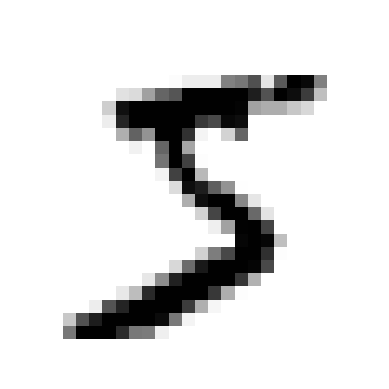

In [12]:
def plot_digit(image_data):
  image=image_data.reshape(28,28)
  plt.imshow(image,cmap='binary')
  plt.axis('off')

example_digit=X[0]
plot_digit(example_digit)
plt.show()

In [13]:
y[0]

'5'

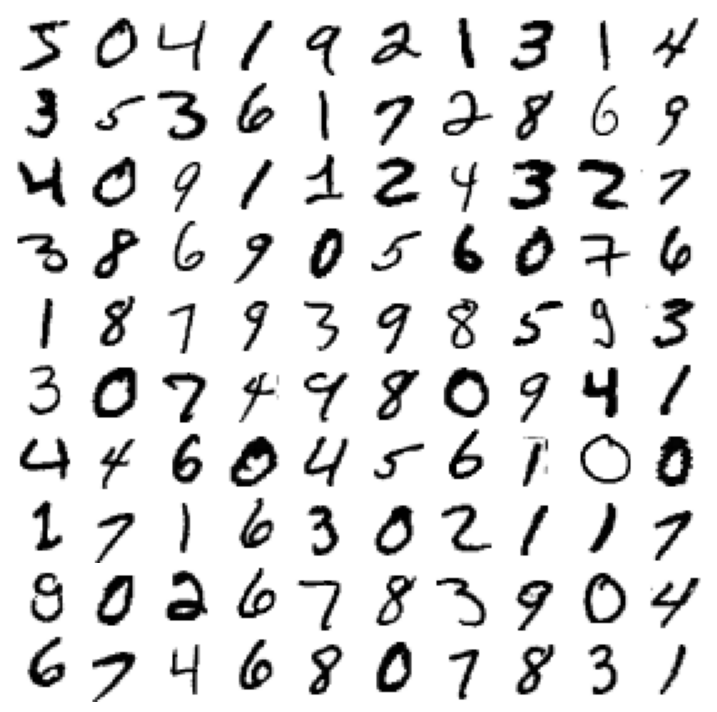

In [14]:
plt.figure(figsize=(9,9))

for idx,image_data in enumerate(X[:100]):
  plt.subplot(10,10,idx+1)
  plot_digit(image_data)
plt.subplots_adjust(wspace=0,hspace=0)
plt.show()

In [15]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [17]:
y_train_5=(y_train=='5')
y_test_5=(y_test=='5')

In [19]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [20]:
sgd_clf.predict([example_digit])

array([ True])

In [21]:
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [23]:
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [24]:
cm=confusion_matrix(y_train_5,y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [25]:
confusion_matrix(y_train_5,y_train_5)

array([[54579,     0],
       [    0,  5421]])

In [28]:
print(f"Classification Report\n {classification_report(y_train_5,y_train_pred)}")

Classification Report
               precision    recall  f1-score   support

       False       0.97      0.99      0.98     54579
        True       0.84      0.65      0.73      5421

    accuracy                           0.96     60000
   macro avg       0.90      0.82      0.85     60000
weighted avg       0.95      0.96      0.95     60000



In [29]:
y_scores=sgd_clf.decision_function([example_digit])
y_scores

array([2164.22030239])

In [31]:
threshold=0
y_eg_digit_pred=(y_scores>threshold)

In [32]:
y_eg_digit_pred

array([ True])

In [33]:
threshold=3000
y_eg_digit_pred=(y_scores>threshold)
y_eg_digit_pred

array([False])

In [35]:
y_scores=cross_val_predict(sgd_clf,
                           X_train,
                           y_train_5,
                           cv=3,
                           method='decision_function')

In [36]:
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

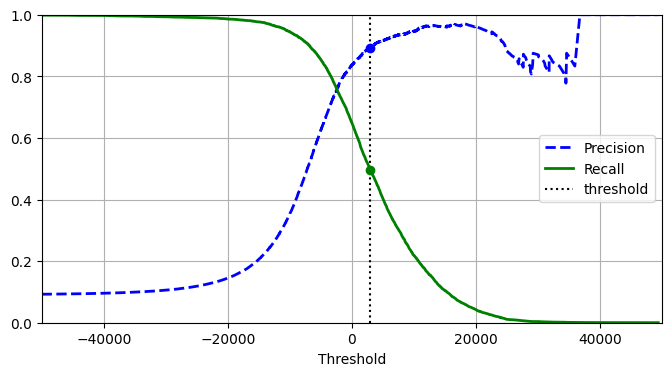

In [37]:
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
# save_fig("precision_recall_vs_threshold_plot")

plt.show()

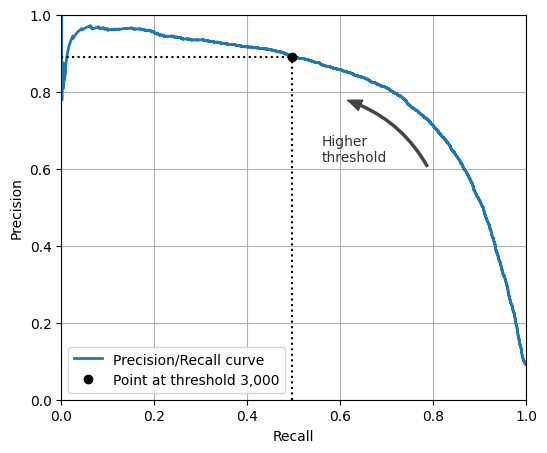

In [38]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
# save_fig("precision_vs_recall_plot")

plt.show()

In [39]:
idx_for_90_precision=(precisions>=0.90).argmax()
threshold_for_90_precision=thresholds[idx_for_90_precision]
threshold_for_90_precision

np.float64(3370.0194991439557)

In [40]:
y_train_pred_90=(y_scores>=threshold_for_90_precision)
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [41]:
recall_at_90_precision=recall_score(y_train_5,y_train_pred_90)
recall_at_90_precision

0.4799852425751706

In [43]:
fpr,tpr,threshold=roc_curve(y_train_5,y_scores)

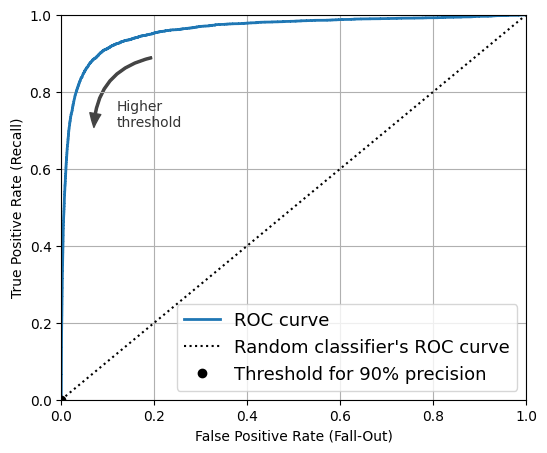

In [44]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
# save_fig("roc_curve_plot")

plt.show()

In [46]:
roc_auc_score(y_train_5,y_scores)

np.float64(0.9604938554008616)

In [48]:
svm_clf=SVC(random_state=42)
svm_clf.fit(X_train[:2000],
            y_train[:2000])

SVC(random_state=42)

In [49]:
svm_clf.predict([example_digit])

array(['5'], dtype=object)